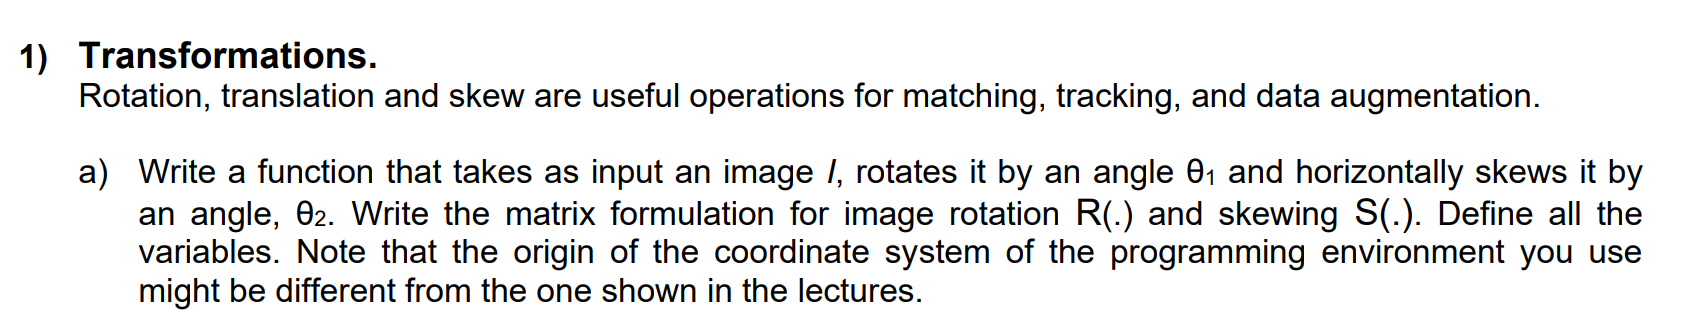

In [96]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [97]:
path = input("Enter the Image path\n")
image = np.array(Image.open(path))
theta_1, theta_2 = map(lambda s: int(s), input("Enter the angles for rotation and skewness : ").split())

Enter the Image path
test.jpg
Enter the angles for rotation and skewness : 30 45


In [98]:
def calculate_trigonometry_params(theta):
    theta = math.radians(theta)
    return math.sin(theta), math.cos(theta), math.tan(theta)

In [99]:
def skew(image, theta):
    new_height  = image.shape[0]
    tan = math.tan(math.radians(theta))
    new_width  = round(abs(image.shape[1])+abs(image.shape[0]/tan))+1
    output = np.zeros((new_height,new_width,image.shape[2]))
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            new_x = round(j + (i/tan))
            new_y = i

            output[new_y,new_x,:]=image[i,j,:]   
    return output


In [100]:
def rotate (image, theta):
    
    x, y, channels = image.shape[1], image.shape[0], image.shape[2]
    sin, cos, _ = calculate_trigonometry_params(theta_1)
    rotation_matrix =  np.array([[cos, -sin],
                            [sin, cos]])
    
    inverse_rotation_matrix = rotation_matrix.T
    new_height  = round(abs(y * cos) + abs(x * sin))+1
    new_width  = round(abs(x * cos) + abs(y * sin))+1
    
    output = np.zeros((new_height, new_width, channels))
    original_center_point = [round(((image.shape[1]+1)/2)-1), round(((image.shape[0]+1)/2)-1)] #x, y = width, height
    new_center_point = [round(((new_width+1)/2)-1) , round(((new_height+1)/2)-1)]
    
    
    for i in range(new_height):
        for j in range(new_width):
            
            #new grid
            y = i - new_center_point[1] +1                   
            x = j - new_center_point[0] +1

            original_x = (int(inverse_rotation_matrix[0,0] * x + inverse_rotation_matrix[0,1] * y))
            original_y = (int(inverse_rotation_matrix[1,0] * x + inverse_rotation_matrix[1,1] * y))


            new_y = original_center_point[1] + original_y
            new_x = original_center_point[0] + original_x

            if new_x < image.shape[1] and new_y < image.shape[0] and new_x>=0 and new_y>=0:
                output[i, j, :] = image[new_y, new_x, :]
    
    return output

In [101]:
def rotate_and_skew (image, theta_1, theta_2):
    #rotate
    output = rotate (image, theta_1) 
    #skew
    output2 = skew(image, theta_2)
    #rotate and skew
    output3 = skew(output, theta_2)
    #skew and rotate
    output_4 = rotate(output2, theta_1)
    
    return output, output2, output3, output_4

In [102]:
results = rotate_and_skew(image, theta_1, theta_2)
labels = ["rotated by {}".format(theta_1), "skewed by {}".format(theta_2),
          "rotated and skewed by {} {}".format(theta_1,theta_2)]

results = list(map(lambda image:Image.fromarray((image).astype(np.uint8)), results[0:3]))

for i in range(len(results)):
    results[i].save("images/"+labels[i] + ".png")
print(results)

[<PIL.Image.Image image mode=RGB size=1837x1580 at 0x242AA928CD0>, <PIL.Image.Image image mode=RGB size=2501x900 at 0x242AA928520>, <PIL.Image.Image image mode=RGB size=3418x1580 at 0x242AA9285E0>]


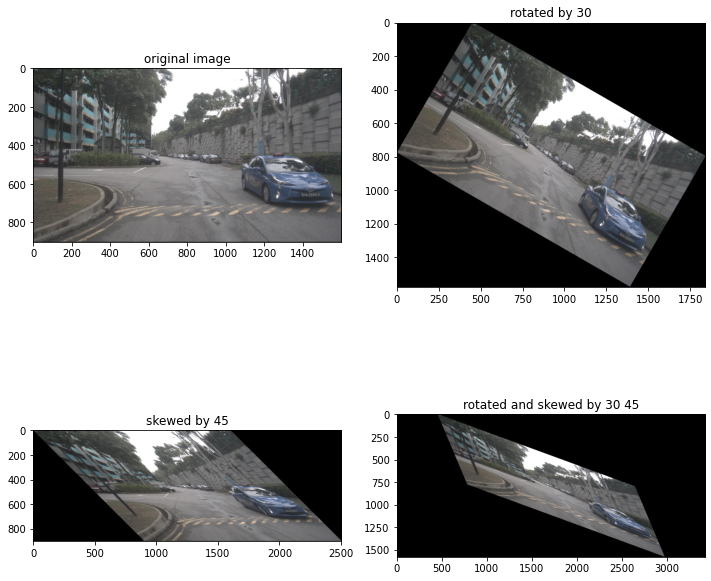

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the first image
axes[0,0].imshow(image)
axes[0,0].set_title('original image')

# Display the second image
axes[0,1].imshow(results[0])
axes[0,1].set_title(labels[0])

axes[1,0].imshow(results[1])
axes[1,0].set_title(labels[1])

axes[1,1].imshow(results[2])
axes[1,1].set_title(labels[2])

# Adjust the layout
plt.tight_layout()
# Show the figure
plt.show()

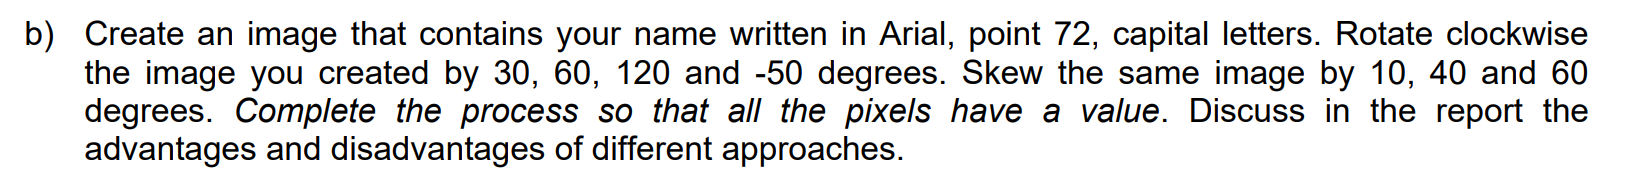

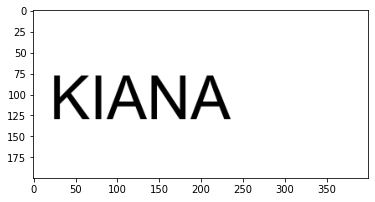

In [104]:
name_image = np.array(Image.open("name_image.png"))

plt.imshow(name_image)

In [105]:
name_image.shape

(200, 400, 3)

In [106]:
rotate_angles = [30, 60, 120, -50]
skew_angles = [10, 40, 60]

results = []

for i in rotate_angles:
    for j in skew_angles:
        
        res = Image.fromarray((rotate_and_skew(name_image, i, j)[2]).astype(np.uint8))
        
        results.append(res)

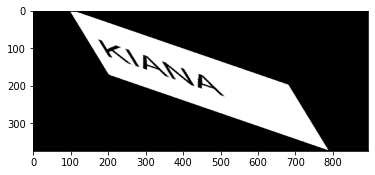

In [110]:
plt.imshow(results[1])

0
1
2
3
4
5
6
7
8
9
10
11


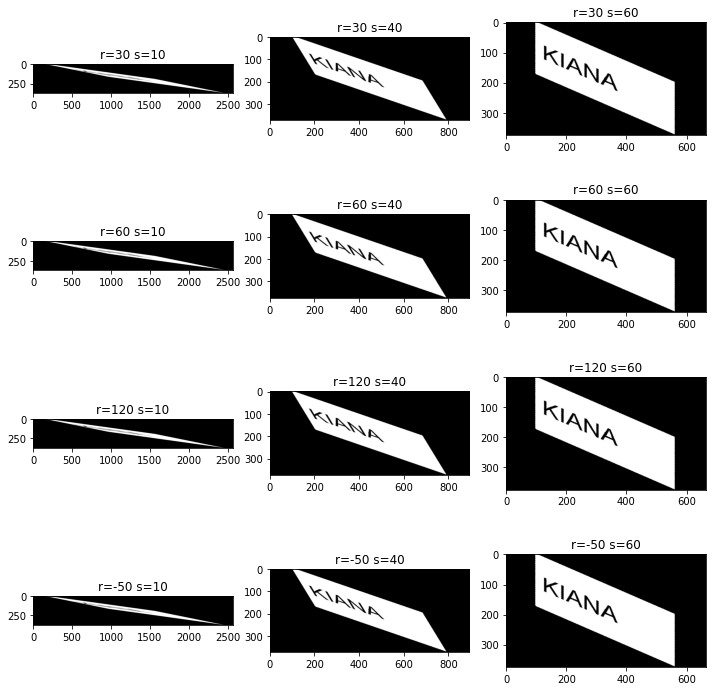

In [111]:
for i in range(len(results)):
    results[i].save("name_images/{}.png".format(i))

fig, axes = plt.subplots(4, 3, figsize=(10, 10))
k = 0
for i in range(4):
    for j in range(3):
        print(k)
        axes[i,j].imshow(results[k])
        axes[i,j].set_title("r={} s={}".format(rotate_angles[i],skew_angles[j]))
        k += 1
        
# Adjust the layout
plt.tight_layout()
# Show the figure
plt.show()

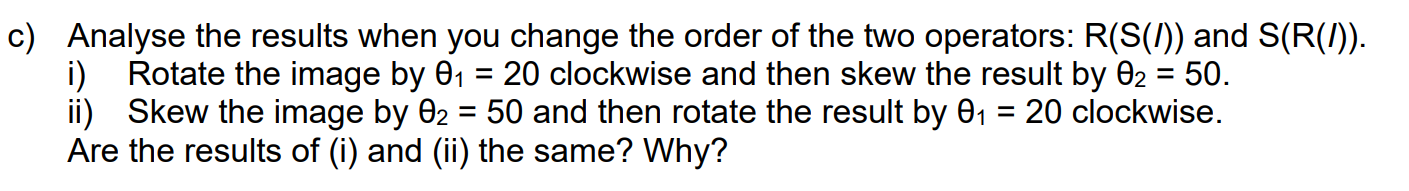

In [90]:
results = rotate_and_skew(name_image,20, 50)
print(len(results))

4


In [91]:
results = list(map(lambda image:Image.fromarray((image).astype(np.uint8)), results))

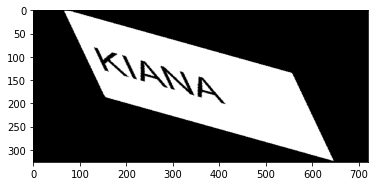

In [92]:
plt.imshow(results[2])


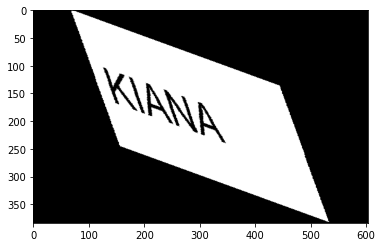

In [93]:
plt.imshow(results[3])

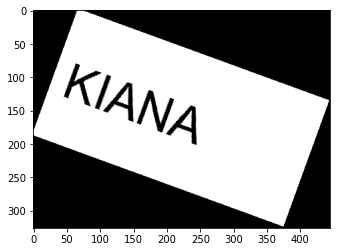

In [94]:
plt.imshow(results[0])

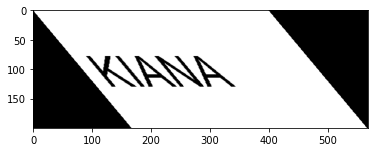

In [95]:
plt.imshow(results[1])